### Principais etapas:

1. Definição do Problema
2. Entendimento e Tratamento do Dados
3. Análise Exploratória
4. Tratamento dos Dados
5. Definição do Modelo
6. Modelo em Produção

### Definição do problema

Para entender o problema, algumas perguntas são fundamentais:

* De forma direta: "Qual problema eu quero resolver?"
* Qual o prazo desejado para esse projeto?
* Quais são as minhas métricas de sucesso?
* Quem são os interressados nesse resultado?
* Quais são os dados disponiveis

Situação problema : Prevendo o preço do aluguel em São Paulo

Base de dados: <https://www.kaggle.com/datasets/dantebarros/transformed-data-from-quinto-andars-platform>

### Inicio

In [2]:
import pandas as pd

In [3]:
base = pd.read_csv("quinto_andar_transformed_data.csv")

In [4]:
base.head(5)

,url,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
0,https://www.quintoandar.com.br/imovel/89332996...,Liberdade,1900.0,424.0,5.0,25.0,38.0,2392.0,57.0,1.0,1.0,1.0,18.0,1.0,0.0,1.0
1,https://www.quintoandar.com.br/imovel/89334069...,Santa Cecília,1190.0,460.0,0.0,16.0,23.0,1689.0,56.0,1.0,1.0,0.0,11.0,1.0,1.0,1.0
2,https://www.quintoandar.com.br/imovel/89333859...,Aclimação,2330.0,450.0,5.0,30.0,46.0,2861.0,48.0,1.0,1.0,1.0,10.0,1.0,0.0,1.0
3,https://www.quintoandar.com.br/imovel/89337065...,Liberdade,1850.0,418.0,6.0,24.0,37.0,2335.0,44.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0
4,https://www.quintoandar.com.br/imovel/89337700...,Vila Guilherme,2200.0,392.0,10.0,28.0,44.0,2674.0,62.0,2.0,2.0,1.0,8.0,1.0,0.0,0.0


In [5]:
#verificando as informações da base de dados
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2775 entries, 0 to 2774
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              2775 non-null   object 
 1   bairro           2775 non-null   object 
 2   aluguel          2775 non-null   float64
 3   condominio       2768 non-null   float64
 4   iptu             2767 non-null   float64
 5   seguro_incendio  2775 non-null   float64
 6   taxa_serviço     2775 non-null   float64
 7   total            2775 non-null   float64
 8   metragem         2775 non-null   float64
 9   quarto           2775 non-null   float64
 10  banheiro         2775 non-null   float64
 11  vaga_carro       2775 non-null   float64
 12  andar            2775 non-null   float64
 13  aceita_pet       2775 non-null   float64
 14  mobilia          2775 non-null   float64
 15  metro_prox       2775 non-null   float64
dtypes: float64(14), object(2)
memory usage: 347.0+ KB


In [6]:
#verificando se há valores nulos na base de dados
base.isnull().sum()

url                0
bairro             0
aluguel            0
condominio         7
iptu               8
seguro_incendio    0
taxa_serviço       0
total              0
metragem           0
quarto             0
banheiro           0
vaga_carro         0
andar              0
aceita_pet         0
mobilia            0
metro_prox         0
dtype: int64

In [7]:
#a coluna condominio possui 7 valores nulos
base[base.condominio.isnull()]

,url,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
987,https://www.quintoandar.com.br/imovel/89288689...,Bela Vista,2960.0,NaN,125.0,49.0,59.0,3193.0,100.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0
1391,https://www.quintoandar.com.br/imovel/89310205...,Perdizes,5200.0,NaN,1030.0,86.0,104.0,6420.0,220.0,3.0,3.0,1.0,0.0,1.0,0.0,0.0
1527,https://www.quintoandar.com.br/imovel/89310896...,Aclimação,3000.0,NaN,158.0,50.0,60.0,3268.0,90.0,3.0,1.0,1.0,0.0,1.0,0.0,1.0
1801,https://www.quintoandar.com.br/imovel/89284189...,Ipiranga,2600.0,NaN,100.0,43.0,52.0,2795.0,100.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0
2287,https://www.quintoandar.com.br/imovel/89288795...,Ipiranga,1000.0,NaN,80.0,17.0,20.0,1117.0,25.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0
2387,https://www.quintoandar.com.br/imovel/89288796...,Ipiranga,1375.0,NaN,100.0,23.0,27.0,1525.0,50.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2751,https://www.quintoandar.com.br/imovel/89288796...,Ipiranga,1375.0,NaN,100.0,23.0,27.0,1525.0,50.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [8]:
base.url[1527]

'https://www.quintoandar.com.br/imovel/893108962?house_tags=rentOnTermination&house_tags=rentPriceDecreased&search_rank=%7B%22sortMode%22%3A%22relevance%22%2C%22searchMode%22%3A%22list%22%2C%22resultsOrigin%22%3A%22search%22%2C%22rank%22%3A2293%2C%22personalization%22%3Atrue%7D&search_id=%224bf69054f19a11eb87180a0adc3b16b0%22&from_route=%22search_results%22'

O que aconteceu logo acima foi que, onde possui os valores nulos, nao existe condominio, ou seja, foram anunciadas cadas ao invés de apartamentos

In [9]:
#Tratando os valores nulos
base.loc[base.condominio.isnull(), 'condominio']

987    NaN
1391   NaN
1527   NaN
1801   NaN
2287   NaN
2387   NaN
2751   NaN
Name: condominio, dtype: float64

In [10]:
#substituindo os valores por zero
base.loc[base.condominio.isnull(), 'condominio'] = 0

In [11]:
#verificando novamente os valores nulos
base.isnull().sum()

url                0
bairro             0
aluguel            0
condominio         0
iptu               8
seguro_incendio    0
taxa_serviço       0
total              0
metragem           0
quarto             0
banheiro           0
vaga_carro         0
andar              0
aceita_pet         0
mobilia            0
metro_prox         0
dtype: int64

In [12]:
base[base.iptu.isnull()]

,url,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
321,https://www.quintoandar.com.br/imovel/89278332...,Jardim Paulista,3530.0,1000.0,NaN,45.0,70.0,4723.0,75.0,1.0,2.0,1.0,10.0,1.0,0.0,1.0
580,https://www.quintoandar.com.br/imovel/89276781...,Aclimação,1500.0,477.0,NaN,20.0,30.0,2027.0,67.0,1.0,1.0,0.0,3.0,0.0,0.0,1.0
732,https://www.quintoandar.com.br/imovel/89277791...,Vila Olímpia,3700.0,0.0,NaN,47.0,74.0,3821.0,60.0,1.0,1.0,1.0,15.0,0.0,0.0,0.0
1348,https://www.quintoandar.com.br/imovel/89277231...,Consolação,2696.0,1033.0,NaN,35.0,53.0,3882.0,88.0,3.0,2.0,1.0,4.0,1.0,1.0,1.0
1486,https://www.quintoandar.com.br/imovel/89279154...,Jardim Paulista,6750.0,1400.0,NaN,86.0,135.0,8371.0,90.0,1.0,2.0,2.0,4.0,0.0,1.0,1.0
1709,https://www.quintoandar.com.br/imovel/89281155...,Aclimação,3000.0,1100.0,NaN,39.0,60.0,4199.0,100.0,3.0,2.0,2.0,2.0,1.0,0.0,1.0
2209,https://www.quintoandar.com.br/imovel/89278332...,Jardim Paulista,3530.0,1000.0,NaN,45.0,70.0,4723.0,75.0,1.0,2.0,1.0,10.0,1.0,0.0,1.0
2659,https://www.quintoandar.com.br/imovel/89279454...,Bela Vista,906.0,267.0,NaN,12.0,18.0,1203.0,27.0,1.0,1.0,0.0,14.0,0.0,0.0,1.0


In [13]:
base.url[1348]

'https://www.quintoandar.com.br/imovel/892772317?search_rank=%7B%22sortMode%22%3A%22relevance%22%2C%22searchMode%22%3A%22list%22%2C%22resultsOrigin%22%3A%22search%22%2C%22rank%22%3A2092%2C%22personalization%22%3Atrue%7D&search_id=%224bf69054f19a11eb87180a0adc3b16b0%22&from_route=%22search_results%22'

A respeito dos valores nulos presentes na coluna 'iptu', ao visitar o anuncio, o imovel encontra-se indisponivel, o que se faz presente tratar estes dados

In [14]:
base.loc[base.iptu.isnull(), 'iptu'] = 0

In [15]:
#verificando novamente os valores
base.isnull().sum()

url                0
bairro             0
aluguel            0
condominio         0
iptu               0
seguro_incendio    0
taxa_serviço       0
total              0
metragem           0
quarto             0
banheiro           0
vaga_carro         0
andar              0
aceita_pet         0
mobilia            0
metro_prox         0
dtype: int64

### Excluindo a coluna 'URL'

In [16]:
base.url

0       https://www.quintoandar.com.br/imovel/89332996...
1       https://www.quintoandar.com.br/imovel/89334069...
2       https://www.quintoandar.com.br/imovel/89333859...
3       https://www.quintoandar.com.br/imovel/89337065...
4       https://www.quintoandar.com.br/imovel/89337700...
                              ...                        
2770    https://www.quintoandar.com.br/imovel/89282425...
2771    https://www.quintoandar.com.br/imovel/89336040...
2772    https://www.quintoandar.com.br/imovel/89292613...
2773    https://www.quintoandar.com.br/imovel/89336592...
2774    https://www.quintoandar.com.br/imovel/89294786...
Name: url, Length: 2775, dtype: object

In [17]:
base = base.drop('url', axis=1)

In [18]:
base.head(3)

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
0,Liberdade,1900.0,424.0,5.0,25.0,38.0,2392.0,57.0,1.0,1.0,1.0,18.0,1.0,0.0,1.0
1,Santa Cecília,1190.0,460.0,0.0,16.0,23.0,1689.0,56.0,1.0,1.0,0.0,11.0,1.0,1.0,1.0
2,Aclimação,2330.0,450.0,5.0,30.0,46.0,2861.0,48.0,1.0,1.0,1.0,10.0,1.0,0.0,1.0


## Análise exploratória de dados

In [19]:
base.describe()

,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
count,2775.000000,2775.000000,2775.000000,2775.000000,2775.000000,2775.000000,2775.000000,2775.000000,2775.000000,2775.000000,2775.000000,2775.000000,2775.000000,2775.000000
mean,2279.097297,596.614054,282.744505,29.955315,45.379099,3235.018378,63.785586,1.593514,1.398919,0.628108,5.930090,0.774414,0.202162,0.734054
std,1329.689743,430.605969,9411.069566,17.679703,26.622973,9587.704870,38.644225,0.749305,0.686516,0.674547,5.001313,0.418043,0.401685,0.441915
min,500.000000,0.000000,0.000000,7.000000,10.000000,697.000000,10.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1400.000000,330.000000,0.000000,18.500000,28.000000,1877.000000,40.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000
50%,1950.000000,520.000000,54.000000,26.000000,39.000000,2616.000000,52.000000,1.000000,1.000000,1.000000,5.000000,1.000000,0.000000,1.000000
75%,2746.500000,800.000000,140.000000,36.000000,54.000000,3756.500000,76.000000,2.000000,2.000000,1.000000,9.000000,1.000000,0.000000,1.000000
max,11250.000000,3300.000000,495800.000000,187.000000,225.000000,499600.000000,587.000000,5.000000,7.000000,6.000000,43.000000,1.000000,1.000000,1.000000


In [20]:
#somando todos os valores de aluguel
base.aluguel.sum()

6324495.0

In [21]:
#contando a quantidade de valores
base.aluguel.count()

2775

In [22]:
base.aluguel.sum()/base.aluguel.count()

2279.0972972972972

In [23]:
base.aluguel.std()

1329.689742656781

In [24]:
base.aluguel.median()

1950.0

In [25]:
# base.aluguel.quantile(0.75)
base.aluguel.quantile(0.75)

2746.5

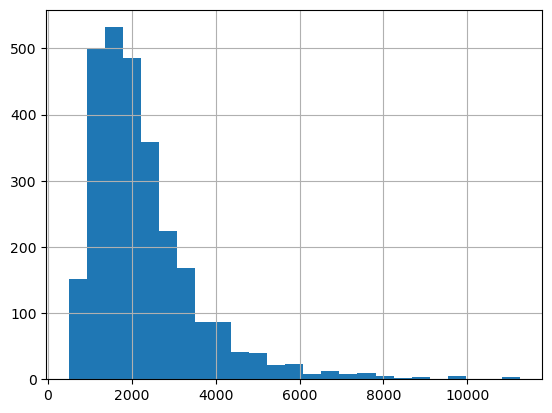

In [26]:
#apresentando o histograma
base.aluguel.hist(bins=25);

In [27]:
#verificando as 10 propriedades de maior valor
base.sort_values('aluguel', ascending=False).head(10)

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
235,Vila Nova Conceição,11250.0,0.0,584.0,187.0,225.0,12250.0,300.0,4.0,4.0,3.0,0.0,1.0,0.0,0.0
2305,Vila Nova Conceição,11250.0,0.0,584.0,187.0,225.0,12250.0,300.0,4.0,4.0,3.0,0.0,1.0,0.0,0.0
1581,Jardim Paulista,10870.0,2008.0,575.0,138.0,217.0,13810.0,190.0,3.0,4.0,1.0,1.0,1.0,0.0,1.0
762,Paraíso,10500.0,2425.0,42.0,134.0,210.0,13310.0,200.0,3.0,5.0,2.0,8.0,1.0,1.0,1.0
1402,Jardim Paulista,9700.0,2300.0,416.0,123.0,194.0,12730.0,178.0,3.0,3.0,1.0,2.0,1.0,0.0,0.0
2723,Jardim Paulista,9700.0,2300.0,416.0,123.0,194.0,12730.0,178.0,3.0,3.0,1.0,2.0,1.0,0.0,0.0
255,Jardim Paulista,9690.0,1900.0,1000.0,123.0,193.0,12910.0,151.0,3.0,5.0,3.0,5.0,1.0,0.0,1.0
2311,Jardim Paulista,9690.0,1900.0,1000.0,123.0,193.0,12910.0,151.0,3.0,5.0,3.0,5.0,1.0,0.0,1.0
1629,Jardim Paulista,9660.0,1300.0,333.0,123.0,193.0,11610.0,130.0,2.0,2.0,1.0,5.0,1.0,0.0,1.0
387,Itaim Bibi,9200.0,2380.0,694.0,117.0,184.0,12580.0,210.0,4.0,4.0,2.0,11.0,1.0,0.0,0.0


In [28]:
#verificando se existem valores duplicados na base
base[base.duplicated()]

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
77,Barra Funda,1060.0,287.0,0.0,14.0,21.0,1382.0,50.0,1.0,1.0,0.0,2.0,1.0,0.0,1.0
176,Belém,1200.0,200.0,20.0,20.0,24.0,1464.0,30.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
250,Belém,1200.0,200.0,20.0,20.0,24.0,1464.0,30.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
267,Paraíso,3400.0,1372.0,360.0,44.0,68.0,5244.0,147.0,3.0,3.0,1.0,4.0,1.0,0.0,1.0
306,Perdizes,2150.0,0.0,0.0,28.0,43.0,2221.0,72.0,1.0,2.0,0.0,3.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2767,Vila Nova Conceição,3090.0,900.0,184.0,40.0,61.0,4275.0,85.0,2.0,2.0,1.0,12.0,1.0,0.0,0.0
2770,Aclimação,2200.0,0.0,72.0,37.0,44.0,2353.0,90.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0
2771,Santa Cecília,1120.0,280.0,0.0,15.0,22.0,1437.0,32.0,1.0,1.0,0.0,7.0,1.0,0.0,1.0
2773,Aclimação,1100.0,308.0,16.0,14.0,22.0,1460.0,30.0,1.0,1.0,0.0,7.0,1.0,0.0,1.0


In [29]:
base[base.duplicated(keep='last')]

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
0,Liberdade,1900.0,424.0,5.0,25.0,38.0,2392.0,57.0,1.0,1.0,1.0,18.0,1.0,0.0,1.0
1,Santa Cecília,1190.0,460.0,0.0,16.0,23.0,1689.0,56.0,1.0,1.0,0.0,11.0,1.0,1.0,1.0
2,Aclimação,2330.0,450.0,5.0,30.0,46.0,2861.0,48.0,1.0,1.0,1.0,10.0,1.0,0.0,1.0
3,Liberdade,1850.0,418.0,6.0,24.0,37.0,2335.0,44.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0
4,Vila Guilherme,2200.0,392.0,10.0,28.0,44.0,2674.0,62.0,2.0,2.0,1.0,8.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2662,Consolação,2800.0,430.0,0.0,36.0,56.0,3322.0,35.0,1.0,1.0,1.0,18.0,0.0,1.0,1.0
2674,Consolação,1200.0,325.0,42.0,16.0,24.0,1607.0,40.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
2680,Jardim Paulista,4182.0,887.0,302.0,53.0,83.0,5507.0,130.0,2.0,1.0,0.0,5.0,1.0,0.0,1.0
2684,Liberdade,1080.0,180.0,21.0,14.0,21.0,1316.0,25.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0


In [30]:
#verificando novamente os valores
base.sort_values('aluguel', ascending=False).head(10)

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
235,Vila Nova Conceição,11250.0,0.0,584.0,187.0,225.0,12250.0,300.0,4.0,4.0,3.0,0.0,1.0,0.0,0.0
2305,Vila Nova Conceição,11250.0,0.0,584.0,187.0,225.0,12250.0,300.0,4.0,4.0,3.0,0.0,1.0,0.0,0.0
1581,Jardim Paulista,10870.0,2008.0,575.0,138.0,217.0,13810.0,190.0,3.0,4.0,1.0,1.0,1.0,0.0,1.0
762,Paraíso,10500.0,2425.0,42.0,134.0,210.0,13310.0,200.0,3.0,5.0,2.0,8.0,1.0,1.0,1.0
1402,Jardim Paulista,9700.0,2300.0,416.0,123.0,194.0,12730.0,178.0,3.0,3.0,1.0,2.0,1.0,0.0,0.0
2723,Jardim Paulista,9700.0,2300.0,416.0,123.0,194.0,12730.0,178.0,3.0,3.0,1.0,2.0,1.0,0.0,0.0
255,Jardim Paulista,9690.0,1900.0,1000.0,123.0,193.0,12910.0,151.0,3.0,5.0,3.0,5.0,1.0,0.0,1.0
2311,Jardim Paulista,9690.0,1900.0,1000.0,123.0,193.0,12910.0,151.0,3.0,5.0,3.0,5.0,1.0,0.0,1.0
1629,Jardim Paulista,9660.0,1300.0,333.0,123.0,193.0,11610.0,130.0,2.0,2.0,1.0,5.0,1.0,0.0,1.0
387,Itaim Bibi,9200.0,2380.0,694.0,117.0,184.0,12580.0,210.0,4.0,4.0,2.0,11.0,1.0,0.0,0.0


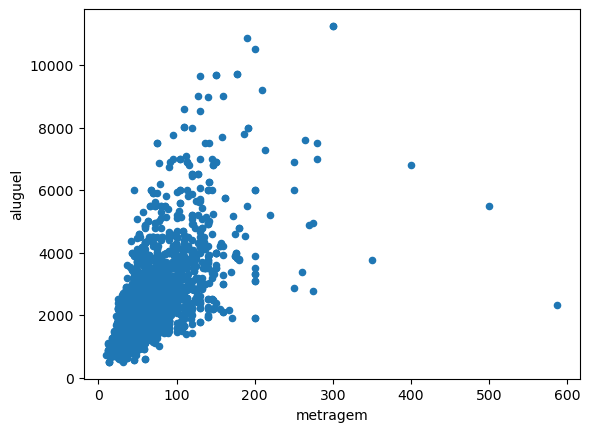

In [31]:
#vizualizando novamente as propriedades mais caras

#os alugueis mais baratos são os que possui menor numero de metros quadrados
base.plot.scatter(x='metragem', y='aluguel');

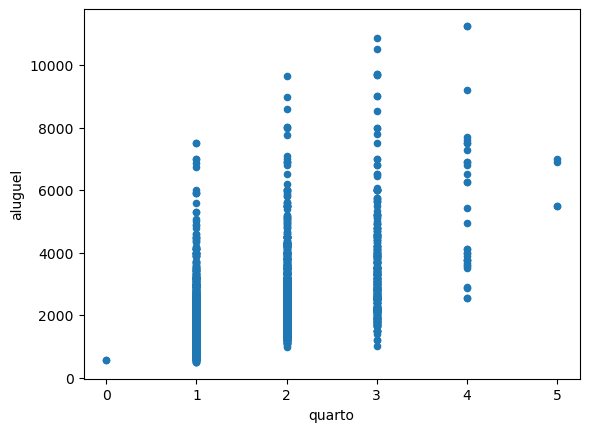

In [32]:
base.plot.scatter(x='quarto', y='aluguel');

Grafico para vizualizar melhor as informações

In [33]:
#Importando a biblioteca seaborn e matplolib
import matplotlib.pyplot as plt
import seaborn as sns

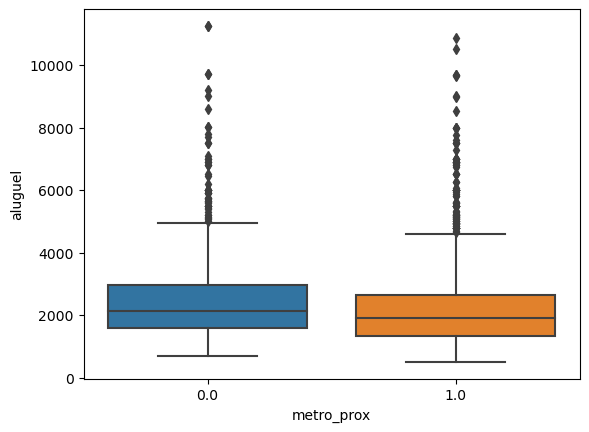

In [34]:
sns.boxplot(x='metro_prox', y='aluguel', data=base);

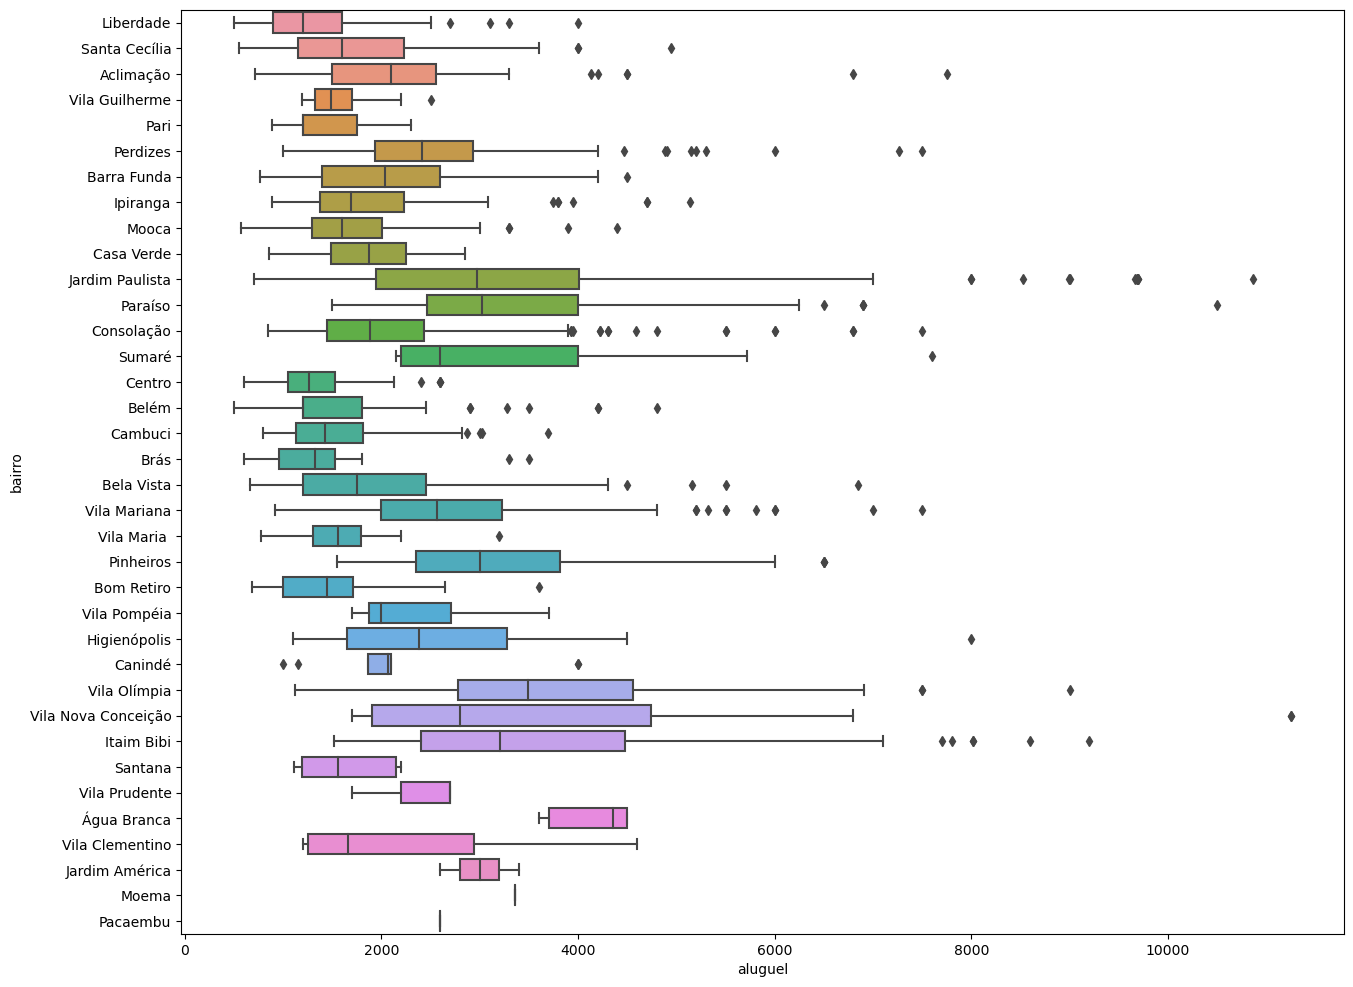

In [35]:
#avaliando o bairro
fig, ax = plt.subplots(figsize=(15,12))
sns.boxplot(x='aluguel', y='bairro', data=base, orient='h');

In [36]:
#verificando a quantidade de registros em cada bairro
base.bairro.value_counts()

Consolação             376
Jardim Paulista        244
Bela Vista             237
Santa Cecília          216
Pinheiros              153
Vila Mariana           148
Mooca                  134
Itaim Bibi             112
Perdizes               112
Cambuci                110
Liberdade              105
Aclimação               97
Centro                  94
Paraíso                 76
Ipiranga                76
Belém                   69
Barra Funda             69
Bom Retiro              64
Brás                    40
Casa Verde              37
Vila Olímpia            36
Higienópolis            33
Vila Guilherme          27
Vila Nova Conceição     20
Vila Pompéia            16
Sumaré                  13
Santana                 12
Vila Clementino         12
Canindé                  9
Vila Maria               8
Pari                     7
Água Branca              5
Vila Prudente            3
Jardim América           2
Moema                    2
Pacaembu                 1
Name: bairro, dtype: int64

In [37]:
#importando uma base de bairros x regiões
regioes = pd.read_excel('bairros.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: 'bairros.xlsx'

C:\Users\Ryan Oliveira\AppData\Local\Temp\ipykernel_11536\127845964.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(base.corr(), annot=True, cmap='RdylGn')


KeyError: "'RdylGn' is not a known colormap name"

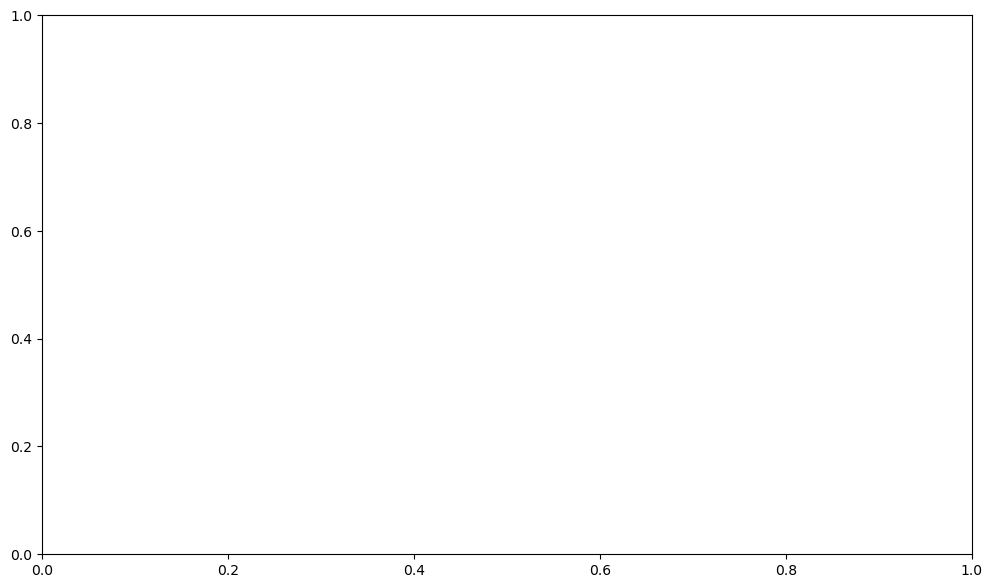

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(base.corr(), annot=True, cmap='RdylGn')
plt.show()

KeyboardInterrupt: 

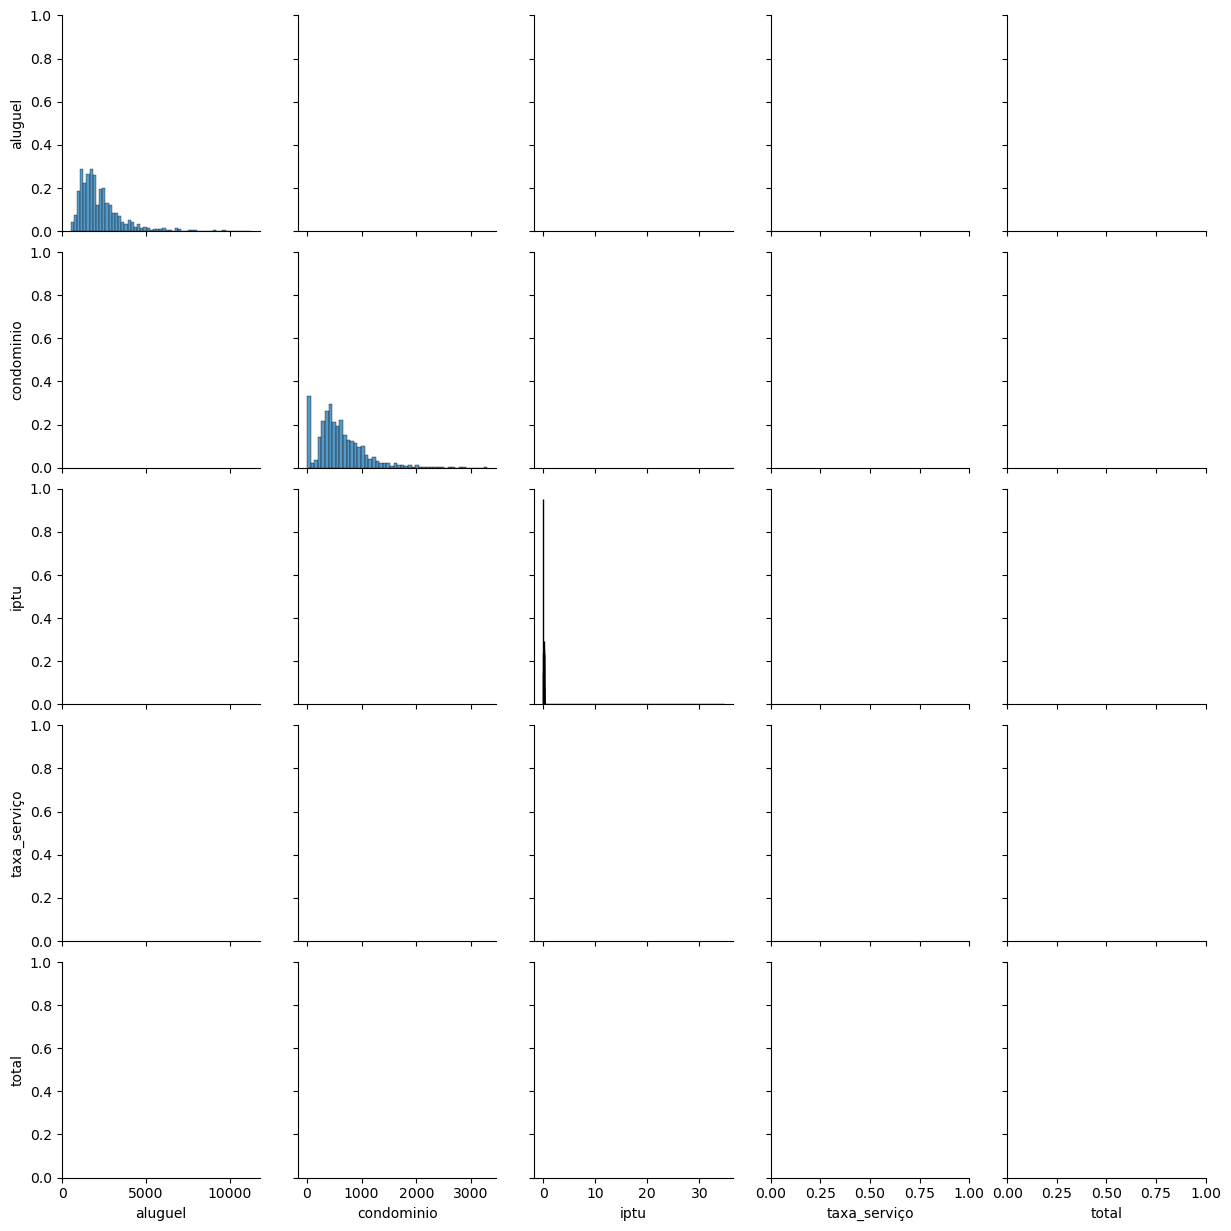

In [44]:
base3 = base[['aluguel', 'condominio', 'iptu', 'taxa_serviço', 'total']]
sns.pairplot(base3);

## Tratamento dos dados

In [39]:
#Verificando a taxa de serviço
base['taxa_serviço'] = round((base.taxa_serviço/base.aluguel)*100, 2)

In [40]:
base.taxa_serviço.value_counts()

2.00    1722
1.98     249
1.99     237
1.96     161
1.97     157
1.93      68
1.95      62
1.94      58
1.92      26
1.91      14
1.90       9
1.88       6
2.02       2
2.07       1
2.01       1
1.89       1
2.03       1
Name: taxa_serviço, dtype: int64

In [41]:
base['iptu'] = round((base.iptu/base.aluguel), 2)

In [42]:
base.iptu.value_counts().head(3)

0.00    880
0.03    273
0.04    237
Name: iptu, dtype: int64

In [43]:
base.head(3)

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
0,Liberdade,1900.0,424.0,0.0,25.0,2.00,2392.0,57.0,1.0,1.0,1.0,18.0,1.0,0.0,1.0
1,Santa Cecília,1190.0,460.0,0.0,16.0,1.93,1689.0,56.0,1.0,1.0,0.0,11.0,1.0,1.0,1.0
2,Aclimação,2330.0,450.0,0.0,30.0,1.97,2861.0,48.0,1.0,1.0,1.0,10.0,1.0,0.0,1.0


In [46]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2775 entries, 0 to 2774
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bairro           2775 non-null   object 
 1   aluguel          2775 non-null   float64
 2   condominio       2775 non-null   float64
 3   iptu             2775 non-null   float64
 4   seguro_incendio  2775 non-null   float64
 5   taxa_serviço     2775 non-null   float64
 6   total            2775 non-null   float64
 7   metragem         2775 non-null   float64
 8   quarto           2775 non-null   float64
 9   banheiro         2775 non-null   float64
 10  vaga_carro       2775 non-null   float64
 11  andar            2775 non-null   float64
 12  aceita_pet       2775 non-null   float64
 13  mobilia          2775 non-null   float64
 14  metro_prox       2775 non-null   float64
dtypes: float64(14), object(1)
memory usage: 325.3+ KB


## Definição do modelo

### Modelo: Regressão

In [48]:
### Modelo: Regressão
# Separando a base de dados em dados de teste e treino

# variaveis preditoras
x = base.drop('aluguel', axis=1)
y = base.aluguel

In [49]:
#importando o train_test_split da biblioteca sklearn
from sklearn.model_selection import train_test_split

In [54]:
#separando a base
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [51]:
#vizualizando X-TRAIN
x_train.head(3)

,bairro,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
120,Barra Funda,700.0,0.0,14.0,2.00,1836.0,45.0,1.0,1.0,1.0,4.0,1.0,0.0,1.0
283,Consolação,305.0,0.0,21.0,1.96,1937.0,35.0,1.0,1.0,0.0,9.0,0.0,1.0,1.0
1190,Centro,450.0,0.0,27.0,1.98,2644.0,70.0,2.0,1.0,0.0,24.0,0.0,1.0,1.0


In [57]:
#Importando a regressao linear
from sklearn.linear_model import LinearRegression

In [58]:
#Treinando o modelo
reg = LinearRegression().fit(x_train, y_train)

ValueError: could not convert string to float: 'Barra Funda'

In [56]:
reg.score(x_train, y_train)

NameError: name 'reg' is not defined